In [1]:
pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import numpy as np

In [8]:
from scipy.stats import norm
import statistics


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/AdityaNarayan23/DAX-Freshers-Training/main/healthcare-dataset-stroke-data.csv")

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
#Total Records in the Dataset

df.shape[0]

5110

In [13]:
#Total Count of Null values in the Dataset

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#Overall Statistics of each numerical column in the dataset

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 1. Plot Charts

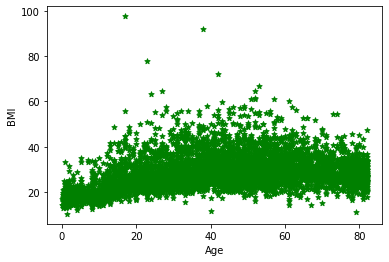

In [15]:
#Plotting a ScatterPlot of Age vs BMI

X = df.iloc[:,2]
Y = df.iloc[:,9]

plt.xlabel("Age")
plt.ylabel("BMI")

plt.scatter(X , Y, label= "stars", color= "green", 
            marker= "*", s=30)

<AxesSubplot:xlabel='stroke', ylabel='age'>

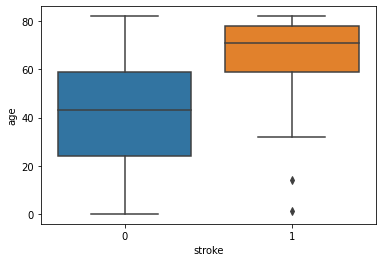

In [16]:
#Through this plot we can understand that the age group between 60-80 have a stroke whereas the age group between 20-60 
#have no stroke according to the data

sns.boxplot(data=df,x='stroke',y='age')

# 2. Checking Null Values and Percentage and filling Null values

In [17]:
#Calculating count of null values in BMI Column

count_of_na = df['bmi'].isna().sum()
count_of_na

201

In [18]:
#Calculating percentage of null values in BMI Column

percentage = (count_of_na / df.shape[0]) * 100
print(percentage)

3.9334637964774952


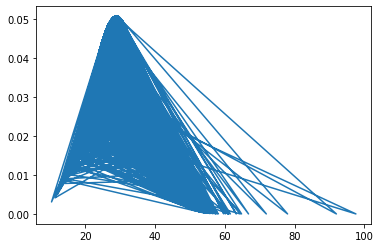

In [19]:
#Checking the distribution of BMI

plt.plot(Y, norm.pdf(Y, df['bmi'].mean(), df['bmi'].std()))
plt.show()

In [20]:
#Filling the missing values with Median because the distribution is Skew

median_value = df['bmi'].median()
df['bmi'].fillna(value=median_value, inplace=True)

# 3. Removing Outliers

In [21]:
#Since the data is skewed, instead of using a z-score I have used interquartile range to determine and remove the outliers

#Function for calculating the Lower and Upper bound using IQR rule

def calculatingBounds(col):
    sorted(col)
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound,upper_bound


In [22]:
#Removing Outliers of BMI Column

lower_bound,upper_bound = calculatingBounds(df['bmi'])

df.drop(df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)].index , inplace=True)


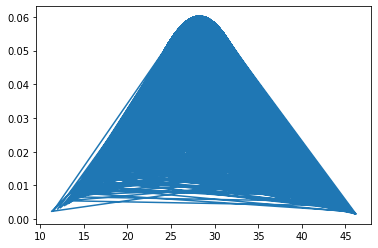

In [23]:
#Checking Distribution of BMI after removing outliers

plt.plot(df['bmi'], norm.pdf(df['bmi'], df['bmi'].mean(), df['bmi'].std()))
plt.show()

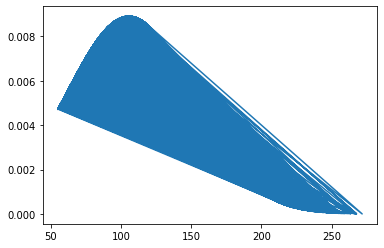

In [24]:
#Checking Distribution of Average Glucose Level before removing outliers

plt.plot(df['avg_glucose_level'], norm.pdf(df['avg_glucose_level'], df['avg_glucose_level'].mean(), df['avg_glucose_level'].std()))
plt.show()

In [25]:
#Removing Outliers of Average Glucose Level Column

lower_bound,upper_bound = calculatingBounds(df['avg_glucose_level'])

df.drop(df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)].index , inplace=True)

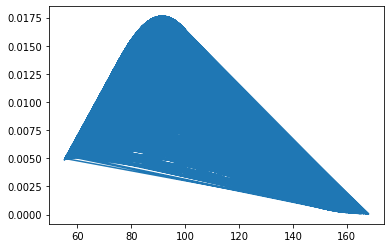

In [26]:
#Checking Distribution of Average Glucose Level after removing outliers

plt.plot(df['avg_glucose_level'], norm.pdf(df['avg_glucose_level'], df['avg_glucose_level'].mean(), df['avg_glucose_level'].std()))
plt.show()

# 4. Scaling on Numerical Columns

In [27]:
#Scaling all Numerical Columns using Standard Scaler because the data is somewhat normally distributed

scaler = StandardScaler()
X = df[['id','hypertension','heart_disease','avg_glucose_level', 'bmi', 'age', 'stroke']]
df[['id','hypertension','heart_disease','avg_glucose_level', 'bmi', 'age', 'stroke']] = scaler.fit_transform(X)

# 5. Encoding on Categorical Columns

In [31]:
#Performed Label Encoding on all Categorical Columns

encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

In [32]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1841,1,101,0,1,1,2,0,2444,197,2,1
6,3221,1,95,1,1,1,2,0,579,146,2,1
7,638,0,90,0,0,0,2,1,1919,100,2,1
8,1618,0,80,0,0,1,2,0,898,153,0,1
9,3640,0,99,0,0,1,2,1,123,114,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1122,0,101,1,0,1,2,1,1338,153,2,0
5106,2655,0,102,0,0,1,3,1,2982,272,2,0
5107,1193,0,56,0,0,1,3,0,1294,178,2,0
5108,2226,1,72,0,0,1,2,0,3309,128,1,0


In [33]:
df.to_csv("Resultant_CSV.csv", index=False)